<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/M02L02_Lab_Transfer_Learning_Implementation_v1_Answered_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Lab: Transfer Learning Implementation


##### Estimated time needed:  30 minutes


In this lab, you will learn to implement transfer learning using a pre-trained model in Keras.

#### Learning objectives

By the end of this lab, you will:

 - Import necessary libraries and load the dataset.
 - Load a pre-trained model, VGG16, excluding the top layers.
 - Add new layers on top of the base model and compile the model.
 - Train the model on the new dataset.
 - Unfreeze some of the layers of the pre-trained model and fine-tune them.



### Step-by-Step Guide:

#### Step 1: Setup the Environment

Before we start, make sure to import the required libraries: TensorFlow and Keras. Keras is included within TensorFlow as `tensorflow.keras`.


In [1]:
# ✅ RECOMMENDED: Use pre-installed compatible versions in Colab
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


##### Explanation:
- `tensorflow` is the main library for machine learning in Python.
- `Sequential` is used to create a model with a linear stack of layers.
- `Dense` and `Flatten` are types of layers that we will use in our model.


#### Step 2: Load Pre-trained Model


In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


#### Step 3: Create and Compile the Model


In [5]:
from tensorflow.keras.models import Sequential  # ✅ Import this
from tensorflow.keras.layers import Flatten, Dense

# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change this for your number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


### **Create Placeholder Images**


In [6]:
import os
from PIL import Image
import numpy as np

# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")


Sample images created in 'sample_data/'


#### Step 4: Train the Model


In [7]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.5000 - loss: 0.6934
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5000 - loss: 6.1828
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5000 - loss: 2.8547
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 1.0000 - loss: 0.5692
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5000 - loss: 0.7092
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5000 - loss: 0.7133
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5000 - loss: 0.7157
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5000 - loss: 0.7163
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.5000 - loss: 0.7153
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5000 - loss: 0.7129


#### Step 5: Fine-Tune the Model


In [8]:
# Unfreeze the top layers of the base model

for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model again
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model again
model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 0.7094
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5000 - loss: 2.2361
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.5000 - loss: 3.7661
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.5000 - loss: 0.7038
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5000 - loss: 0.8234
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5000 - loss: 0.6907
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.5000 - loss: 0.6708
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5000 - loss: 0.6485
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.6000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.5362


### Exercises


#### Exercise 1: Visualize Training and Validation Loss

**Objective:** Plot the training and validation loss to observe the learning process of the model.

**Instructions:**
1. Modify the training code to include validation data.
2. Plot the training and validation loss for each epoch.


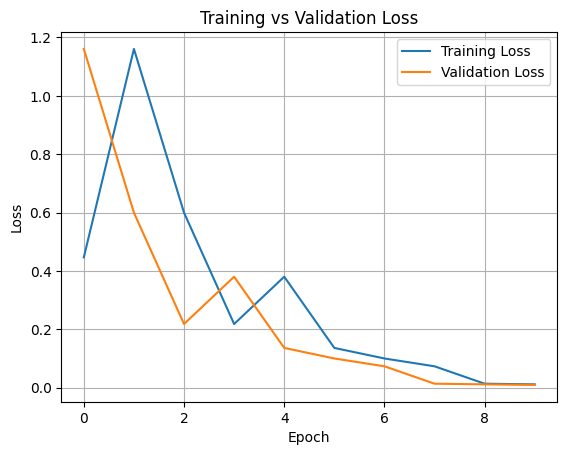

In [16]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


<details>
<summary>Click here for solution</summary> </br>

```python
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 16 images belonging to 4 classes.
Found 4 images belonging to 4 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 0.4467 - val_accuracy: 0.5000 - val_loss: 1.1606
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.5000 - loss: 1.1606 - val_accuracy: 0.5000 - val_loss: 0.5996
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5000 - loss: 0.5996 - val_accuracy: 1.0000 - val_loss: 0.2182
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 1.0000 - loss: 0.2182 - val_accuracy: 0.5000 - val_loss: 0.3803
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.5000 - loss: 0.3803 - val_accuracy: 1.0000 - val_loss: 0.1364
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 0.1364 - val_accuracy: 1.0000 - val_loss: 0.1002
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 1.0000 - loss: 0.1002 - val_accuracy: 1.0000 - val_loss: 0.0734
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

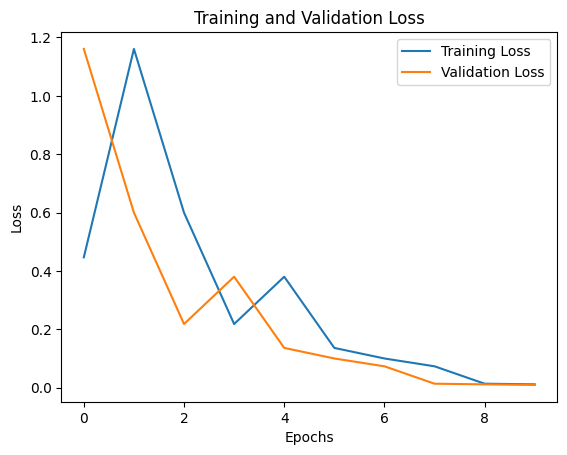

In [15]:
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Exercise 2: Experiment with Different Optimizers

**Objective:** Experiment with different optimizers and observe their impact on model performance.

**Instructions:**
1. Change the optimizer from `adam` to `sgd` and `rmsprop`.
2. Retrain the model with each optimizer and compare the accuracy.


In [17]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


<details>
<summary>Click here for solution</summary> </br>

```python
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.001

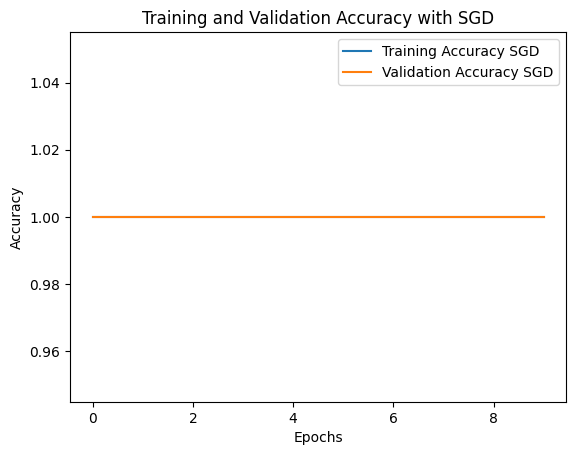

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.5000 - val_loss: 42.6190
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5000 - loss: 42.6190 - val_accuracy: 0.5000 - val_loss: 0.8988
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.5000 - loss: 0.8988 - val_accuracy: 0.5000 - val_loss: 7.7642
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.5000 - loss: 7.7642 - val_accuracy: 0.5000 - val_loss: 1.2219
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.5000 - loss: 1.2219 - val_accuracy: 0.5000 - val_loss: 0.8029
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5000 - loss: 0.8029 - val_accuracy: 0.5000 - val_loss: 0.6247
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.5000 - loss: 0.6247 - val_accuracy: 1.0000 - val_loss: 0.5385
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 1.0000 - loss: 0.5385 - val_accuracy: 1.0000 - val_loss: 

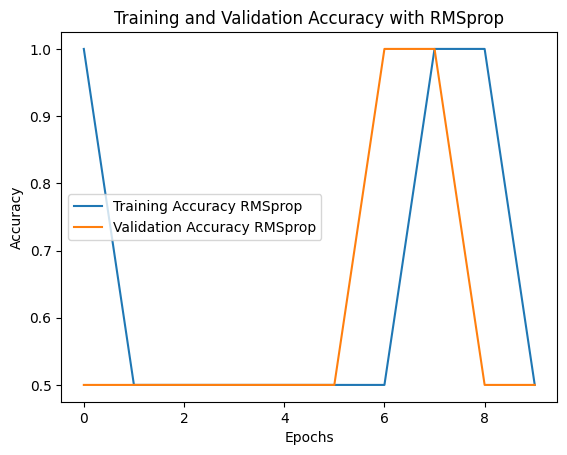

In [20]:
from tensorflow.keras.models import clone_model
import matplotlib.pyplot as plt

# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Exercise 3: Evaluate the Model on a Test Set

**Objective:** Evaluate the fine-tuned model on an unseen test set to assess its generalization performance.

**Instructions:**
1. Load a separate test set.
2. Evaluate the model on this test set and report the accuracy and loss.


<details>
<summary>Click here for solution</summary> </br>

```python
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')


In [23]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0096
Test Accuracy: 100.00%
Test Loss: 0.0096


### Summary

By completing these exercises, students will:

1. Visualize the training and validation loss to gain insights into the training process.
2. Experiment with different optimizers to understand their impact on model performance.
3. Evaluate the fine-tuned model on an unseen test set to assess its generalization capability.


#### Conclusion

Congratulations! In this lab, you have successfully implemented transfer learning using a pre-trained model in Keras. This lab exercise demonstrated how to train and fine-tune the model by unfreezing some of the layers.


Copyright © IBM Corporation. All rights reserved.
